In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

import seaborn as sns

sns.set_theme()

In [2]:
bean = pd.read_csv('D:\\2021 - Fall Semester\\1 - class\\577data\\Dry_Bean_Dataset.csv')

new_bean = bean.replace({'SEKER':0, 'BARBUNYA':1, 'BOMBAY':2, 'CALI':3, 'HOROZ':4, 'SIRA':5, 'DERMASON':6})

new_bean.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,0
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,0
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,0
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,0
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,0


In [3]:
X = new_bean.iloc[:, 0:-1]
y = new_bean['Class']

X

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = X
X_scaled[['Area','Perimeter', 'MajorAxisLength','MinorAxisLength', 'ConvexArea', 'EquivDiameter']] = scaler.fit_transform(X_scaled[['Area','Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'ConvexArea', 'EquivDiameter']])

X_scaled

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,-0.840749,-1.143319,-1.306598,-0.631153,1.197191,0.549812,-0.841451,-1.063341,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,-0.829188,-1.013924,-1.395911,-0.434445,1.097356,0.411785,-0.826102,-1.044217,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,-0.807157,-1.078829,-1.252357,-0.585735,1.209713,0.562727,-0.808704,-1.008084,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,-0.785741,-0.977215,-1.278825,-0.439290,1.153638,0.498616,-0.773975,-0.973337,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,-0.781239,-1.097384,-1.380471,-0.266663,1.060798,0.333680,-0.784286,-0.966080,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,-0.373471,-0.446083,-0.366669,-0.363055,1.552728,0.765002,-0.378191,-0.364148,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385
13607,-0.373334,-0.456336,-0.450053,-0.257015,1.476439,0.735702,-0.378662,-0.363962,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219
13608,-0.372038,-0.447833,-0.450478,-0.246456,1.472582,0.734065,-0.376143,-0.362197,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767
13609,-0.371765,-0.427029,-0.428974,-0.266742,1.489326,0.741055,-0.372851,-0.361825,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 0)

In [6]:
# For bagging classifier, we will arbitrarily choose a max_depth to model the same dry bean dataset.

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

bag0 = BaggingClassifier(DecisionTreeClassifier(max_depth=9, random_state=0),
                            n_estimators = 500,
                            bootstrap = True,
                            n_jobs = -1)
bag0.fit(X_train, y_train)
bag_y_pred = bag0.predict(X_test)

In [7]:
y_true = y_test

print('The accuracy score is: {a}; the precision score (on a macro averaged basis, the same as the following two index) is: {b}; the recall score is: {c}; and the f1 score is {d}'.format(
    a = accuracy_score(y_true=y_true, y_pred=bag_y_pred), 
    b = precision_score(y_true=y_true, y_pred=bag_y_pred, average='macro'), 
    c = recall_score(y_true=y_true, y_pred=bag_y_pred, average='macro'), 
    d = f1_score(y_true=y_true, y_pred=bag_y_pred, average='macro')))

The accuracy score is: 0.9233594515181195; the precision score (on a macro averaged basis, the same as the following two index) is: 0.9365812841019026; the recall score is: 0.9312959768852819; and the f1 score is 0.9338241055030265


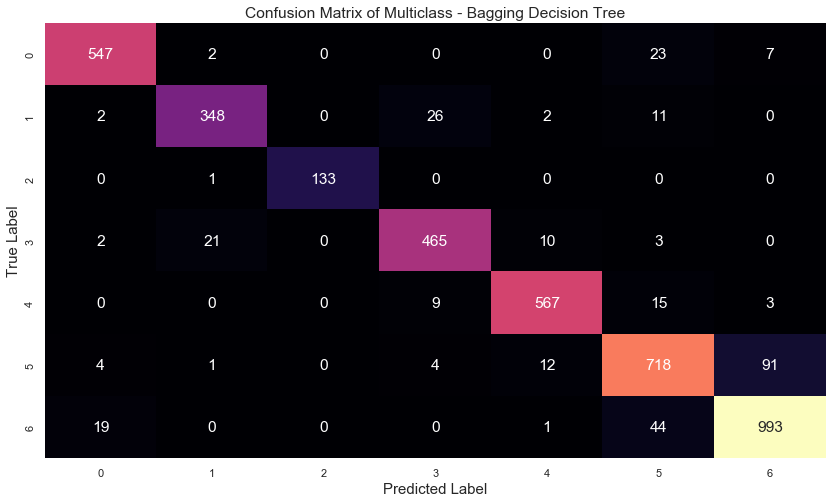

In [8]:
# The confusion matrix
confusion_matrix_bag = metrics.confusion_matrix(y_test, bag_y_pred)

# Convert confusion matrix into dataframe
matrix_df = pd.DataFrame(confusion_matrix_bag)


plt.figure(figsize=(14, 8))
ax = plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df,
            annot = True, 
            fmt = "g",
            ax = ax, 
            cmap = "magma", 
            cbar = False)

ax.set_title("Confusion Matrix of Multiclass - Bagging Decision Tree")
ax.set_xlabel("Predicted Label", fontsize=15)
#ax.set_xticklabels(["red", "blue"])
ax.set_ylabel("True Label", fontsize=15)
#ax.set_yticklabels(["red", "blue"], rotation=0)
plt.show()

#### So from here, we find that the bagging decision tree has a overall good performance. Also we notice that for true label 5, it has a relatively significant portion of samples being wrongly classified into label 6 compared to other true labels. In the next step, we will see if this phenomenon will be improved by using random forest model.

In [9]:
# First we choose the same tree depth from the above code.

from sklearn.ensemble import RandomForestClassifier

forest0 = RandomForestClassifier(max_depth = 10, n_estimators = 500,
                                    bootstrap = True,
                                    n_jobs = -1)
forest0.fit(X_train, y_train)
forest_y_pred = forest0.predict(X_test)

In [10]:
print('The accuracy score is: {a}; the precision score (on a macro averaged basis, the same as the following two index) is: {b}; the recall score is: {c}; and the f1 score is {d}'.format(
    a = accuracy_score(y_true=y_true, y_pred=forest_y_pred), 
    b = precision_score(y_true=y_true, y_pred=forest_y_pred, average='macro'), 
    c = recall_score(y_true=y_true, y_pred=forest_y_pred, average='macro'), 
    d = f1_score(y_true=y_true, y_pred=forest_y_pred, average='macro')))

The accuracy score is: 0.9226248775710089; the precision score (on a macro averaged basis, the same as the following two index) is: 0.9366213485490213; the recall score is: 0.9309556934724025; and the f1 score is 0.9335800024832909


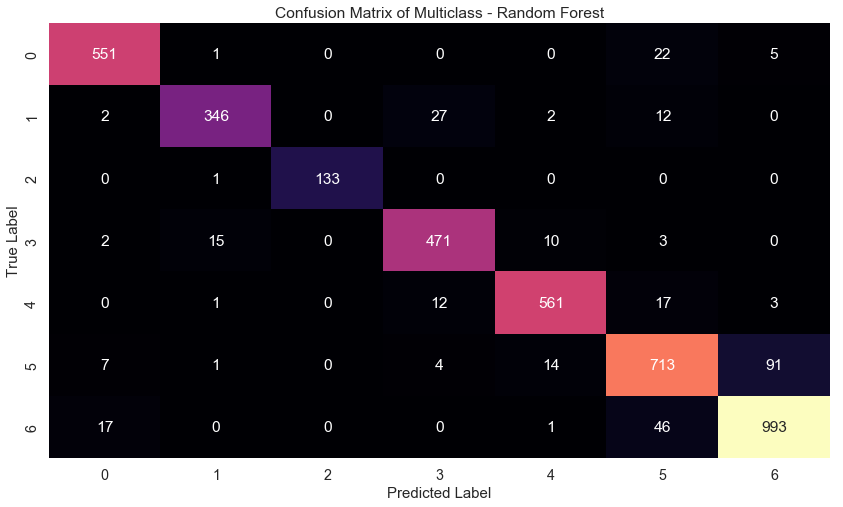

In [11]:
# The confusion matrix
confusion_matrix_forest = metrics.confusion_matrix(y_test, forest_y_pred)

# Convert confusion matrix into dataframe
matrix_df2 = pd.DataFrame(confusion_matrix_forest)


plt.figure(figsize=(14, 8))
ax = plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df2,
            annot = True, 
            fmt = "g",
            ax = ax, 
            cmap = "magma", 
            cbar = False)

ax.set_title("Confusion Matrix of Multiclass - Random Forest")
ax.set_xlabel("Predicted Label", fontsize=15)
#ax.set_xticklabels(["red", "blue"])
ax.set_ylabel("True Label", fontsize=15)
#ax.set_yticklabels(["red", "blue"], rotation=0)
plt.show()

#### We can see that the model accuracys of random forest and bagging classifier remain on the similar level. The problem that true label 5 has a relatively large portion to be wrongly classified into 6 is not addressed by applying the new algorithm.